In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


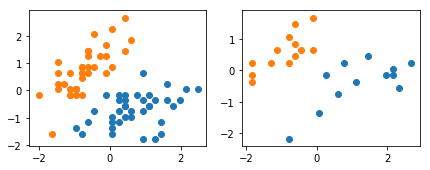

In [4]:
# Dataset
x = np.genfromtxt('../data/iris.data', delimiter=',', usecols=range(2), max_rows=100)
y = np.zeros(100)
y[50:] = 1

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
x_test, y_test = x[idx[:25]], y[idx[:25]]
x_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(x_train, axis=0), np.std(x_train, axis=0)
x_train, x_test = (x_train - mu) / std, (x_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1])
ax[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1])
ax[1].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1])
ax[1].scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1])
plt.show()

In [5]:
# Helper Function
def iterate_minibatches(arrays, batch_size, shuffle=False, seed=None):
    rgen = np.random.RandomState(seed)
    indices = np.arange(arrays[0].shape[0])
    if shuffle:
        rgen.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - batch_size + 1, batch_size):
        index_slice = indices[start_idx:start_idx + batch_size]
        yield (ary[index_slice] for ary in arrays)

In [7]:
# Settings
n_features = x.shape[1]
n_samples = x.shape[0]
learning_rate = 0.05
training_epochs = 15
batch_size = 10

# Graph Definition
g = tf.Graph()
with g.as_default() as g:
    tf_x = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name='inputs')
    tf_y = tf.placeholder(dtype=tf.float32, shape=[None], name='targets')

    params = {
        'weights': tf.Variable(tf.zeros(shape=[n_features, 1], dtype=tf.float32), name='weights'),
        'bias': tf.Variable([[0.1]], dtype=tf.float32, name='bias')
    }

    # Logistic Regression
    linear = tf.matmul(tf_x, params['weights']) + params['bias']
    pred_proba = tf.sigmoid(linear, name='predict_probas')

    r = tf.reshape(pred_proba, [-1])
    cost = tf.reduce_mean(tf.reduce_sum((-tf_y * tf.log(r)) - ((1 - tf_y) * tf.log(1 - r))), name='cost')
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(cost, name='train')

    # Class Prediction
    pred_labels = tf.round(tf.reshape(pred_proba, [-1]), name='predict_labels')
    correct_prediction = tf.equal(tf_y, pred_labels)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# Training & Evaluation
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    avg_cost = np.nan
    count = 1
    for epoch in range(training_epochs):
        train_acc = sess.run('accuracy:0', feed_dict={tf_x: x_train, tf_y: y_train})
        valid_acc = sess.run('accuracy:0', feed_dict={tf_x: x_test, tf_y: y_test})
        print("Epoch: %03d | AvgCost: %.3f" % (epoch, avg_cost / count), end="")
        print(" | Train/Valid ACC: %.2f/%.2f" % (train_acc, valid_acc))
        avg_cost = 0.
        for x_batch, y_batch in iterate_minibatches(arrays=[x_train, y_train], batch_size=batch_size, shuffle=True, seed=123):
            feed_dict = {'inputs:0': x_batch, 'targets:0': y_batch}
            _, c = sess.run(['train', 'cost:0'], feed_dict=feed_dict)
            avg_cost += c
            count += 1

    weights, bias = sess.run(['weights:0', 'bias:0'])
    print('\n Weights:\n', weights)
    print('\n Bias:\n', bias)

Epoch: 000 | AvgCost: nan | Train/Valid ACC: 0.51/0.48
Epoch: 001 | AvgCost: 4.122 | Train/Valid ACC: 1.00/1.00
Epoch: 002 | AvgCost: 1.180 | Train/Valid ACC: 1.00/1.00
Epoch: 003 | AvgCost: 0.587 | Train/Valid ACC: 1.00/1.00
Epoch: 004 | AvgCost: 0.363 | Train/Valid ACC: 1.00/1.00
Epoch: 005 | AvgCost: 0.251 | Train/Valid ACC: 1.00/1.00
Epoch: 006 | AvgCost: 0.186 | Train/Valid ACC: 1.00/1.00
Epoch: 007 | AvgCost: 0.145 | Train/Valid ACC: 1.00/1.00
Epoch: 008 | AvgCost: 0.117 | Train/Valid ACC: 1.00/1.00
Epoch: 009 | AvgCost: 0.097 | Train/Valid ACC: 1.00/1.00
Epoch: 010 | AvgCost: 0.082 | Train/Valid ACC: 1.00/1.00
Epoch: 011 | AvgCost: 0.070 | Train/Valid ACC: 1.00/1.00
Epoch: 012 | AvgCost: 0.061 | Train/Valid ACC: 1.00/1.00
Epoch: 013 | AvgCost: 0.054 | Train/Valid ACC: 1.00/1.00
Epoch: 014 | AvgCost: 0.048 | Train/Valid ACC: 1.00/1.00

 Weights:
 [[ 2.9804766]
 [-2.6913266]]

 Bias:
 [[0.34256113]]
